Jacob Sayono

505368811

CS M148 Winter 2024

Homework 1

# 1. Data & Bias

## Part (a)

Yes, my friend's data collection method exhibit selection bias because the data collection method is not random and does not represent the entire student population's opinions. Reddit users represent a specific segment of the student body, likely those who are more tech-savvy or inclined to share their experiences online. This group may not accurately reflect the diversity of opinions and experiences of all students regarding the dining hall menus. Furthermore, the sentiment analysis model's ability to interpret nuances and the context of the text may also introduce bias, depending on its training data and algorithms. Therefore, this method is likely to yield skewed insights that do not fully capture the broader student body's sentiments.

## Part (b)

The discrimination against women by AI recruiters can be attributed to the training data used to develop these systems. If the historical hiring data reflects a bias towards selecting male candidates over female candidates, the AI will learn and perpetuate this bias. Removing gender data from the dataset might reduce direct gender discrimination, but it does not eliminate bias. Other variables correlated with gender, such as gaps in employment history (which might occur due to maternity leave) or differences in job titles and industries where one gender may dominate, can still lead to biased outcomes. Therefore, merely dropping the gender variable does not address the underlying issue of biased training data and the AI system's ability to infer gender through correlated features.

# 2. Linear Regression: goodness of fit & Interpretation

## 1.

In [30]:
import numpy as np

# Data
years = np.array([1820, 1870, 1910, 1950, 2000])
population = np.array([9, 40, 92, 151, 281])

# Mean of x and y
x_mean = np.mean(years)
y_mean = np.mean(population)

# Calculate β1
beta_1 = np.sum((years - x_mean) * (population - y_mean)) / np.sum((years - x_mean) ** 2)

# Calculate β0
beta_0 = y_mean - beta_1 * x_mean

# Predict population for 2010
year_2010 = 2010
population_2010 = beta_0 + beta_1 * year_2010

print(f"Model parameters: β0 = {beta_0}, β1 = {beta_1}")
print(f"Predicted population for 2010: {population_2010} million")

Model parameters: β0 = -2732.678350515464, β1 = 1.4907216494845361
Predicted population for 2010: 263.6721649484534 million


In [31]:
# Calculate SS_res and SS_tot
SS_res = np.sum((population - (beta_0 + beta_1 * years)) ** 2)
SS_tot = np.sum((population - y_mean) ** 2)

# Calculate R^2
R_squared = 1 - SS_res / SS_tot

print(f"R^2 for the model: {R_squared}")

R^2 for the model: 0.9323216115302541


Yes because R^2 is close to 1, suggesting that the regression line fits the data well. Conversely, a lower R^2 value would indicate that the model does not explain much of the variability in the population data, suggesting a poor fit.

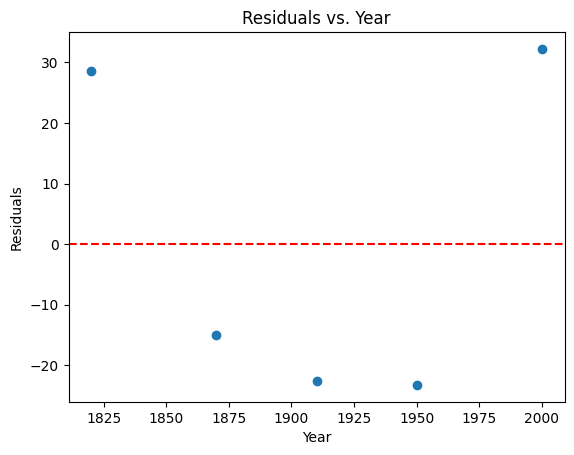

In [32]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = population - (beta_0 + beta_1 * years)

# Plotting
plt.scatter(years, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residuals vs. Year')
plt.show()

No. There's a clear pattern (e.g., a curve or increasing/decreasing trend), this indicates that the model may not be capturing all the underlying trends in the data, and a non-linear model might be more appropriate.

## 2.

The plot shows a strong correlation between heart disease and wine consumption. Based on the provided information, there is a statistically significant linear relationship between heart disease deaths and wine consumption, as evidenced by the regression line and the R-squared value of 71.0%.

However, correlation does not imply causation. While the data suggests a correlation between higher wine consumption and lower heart disease deaths, it does not necessarily mean that increasing wine consumption will directly reduce the risk of heart disease. There could be other factors at play that are not accounted for in the model.

## 3.

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Data
income = np.array([100, 90, 28, 40, 39, 59, 60, 62, 64, 100, 104, 110, 114, 132]).reshape(-1, 1)
consumption = np.array([27, 41, 50, 15, 20, 28, 43, 50, 51, 75, 83, 80, 85, 95])
experience = np.array([8, 9, 2, 3, 1, 3, 5, 3, 5, 7, 10, 12, 4, 8])

# Model for consumption based on income
model_consumption_income = LinearRegression().fit(income, consumption)
beta_0_ci = model_consumption_income.intercept_
beta_1_ci = model_consumption_income.coef_[0]

# Print the coefficients for model 1
print(f"Model 1 (Consumption based on Income): β0 = {beta_0_ci}, β1 = {beta_1_ci}")

Model 1 (Consumption based on Income): β0 = 4.270916376452803, β1 = 0.6199702093735578


In [34]:
# Model for income based on working experience
experience_reshaped = experience.reshape(-1, 1)  # Reshape for sklearn compatibility
model_income_experience = LinearRegression().fit(experience_reshaped, income)
beta_0_ie = model_income_experience.intercept_
beta_1_ie = model_income_experience.coef_[0]

# Print the coefficients for model 2
print(f"Model 2 (Income based on Working Experience): β0 = {beta_0_ie}, β1 = {beta_1_ie}")

Model 2 (Income based on Working Experience): β0 = [35.4], β1 = [7.58]


In [35]:
from sklearn.metrics import r2_score

# Predictions for R^2 calculation
predictions_ci = model_consumption_income.predict(income.reshape(-1, 1))
predictions_ie = model_income_experience.predict(experience.reshape(-1, 1))

# Calculate R^2 for both models
R_squared_ci = r2_score(consumption, predictions_ci)
R_squared_ie = r2_score(income, predictions_ie)

# Printing R^2 values
print(f"R^2 for Consumption based on Income model: {R_squared_ci}")
print(f"R^2 for Income based on Working Experience model: {R_squared_ie}")

R^2 for Consumption based on Income model: 0.5815606212788424
R^2 for Income based on Working Experience model: 0.6026979398313262


The relationships identified in these models highlight the influence of income on consumption and the impact of working experience on income. The positive relationships are consistent with economic theories that suggest higher income leads to higher consumption and that more experience typically results in higher earnings due to increased skills and value in the job market.

The reason behind the R^2 values not being closer to 1 in both models can be attributed to the complexity of human behavior and economic outcomes, which are influenced by a multitude of factors beyond just income or experience. Factors like personal preferences, economic conditions, education, and the nature of the job can all significantly impact consumption patterns and income levels, making it challenging to capture all variance with a single predictor.

## 4.

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Import the data
data = pd.read_csv('experiment.txt')  # Make sure the path is correct

# Prepare the data
X = data['x'].values.reshape(-1, 1)
y = data['y']

# Fit the linear model
model = LinearRegression().fit(X, y)
beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f"β0 = {beta_0}, β1 = {beta_1}")

β0 = 4.528512452357916, β1 = 0.09923934486798955


In [37]:
from sklearn.metrics import r2_score

# Predict y values
y_pred = model.predict(X)

# Compute R^2
r_squared = r2_score(y, y_pred)

print(f"R^2: {r_squared}")

R^2: 0.21072725319848384


No. R^2 is closer to 0 than it is to 1.

In [38]:
import numpy as np

# Residuals
residuals = y - (beta_0 + beta_1 * X.flatten())

# Standard error of the slope (SE(beta_1))
n = len(X)
X_mean = np.mean(X)
SE_beta_1 = np.sqrt(np.sum(residuals**2) / (n - 2)) / np.sqrt(np.sum((X.flatten() - X_mean)**2))

# t-statistic for beta_1
t_statistic = beta_1 / SE_beta_1

# Calculate p-value from t_statistic using scipy (if available)
from scipy.stats import t
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=n-2))

# 95% Confidence Interval for beta_1
CI_lower = beta_1 - 2 * SE_beta_1
CI_upper = beta_1 + 2 * SE_beta_1

print(f"SE(β1): {SE_beta_1}")
print(f"t-statistic for β1: {t_statistic}")
print(f"p-value for β1: {p_value}")
print(f"95% CI for β1: ({CI_lower}, {CI_upper})")

SE(β1): 0.006079555372874688
t-statistic for β1: 16.323454394505287
p-value for β1: 0.0
95% CI for β1: (0.08708023412224017, 0.11139845561373893)


## (c) Hypothesis Test

The t-statistic for β1 is 16.32, and the p-value is 0.0. This indicates a very strong statistical evidence against the null hypothesis, leading us to reject the null hypothesis. The result implies that there is a statistically significant linear relationship between x and y, with the slope (β1) being significantly different from zero. This suggests that changes in x are associated with changes in y.

## (d) 95% Confidence Interval for β1

The 95% confidence interval for β1 is calculated to be (0.087, 0.111). This interval does not include 0, which further supports the conclusion that β1 is significantly different from 0. However, since the entire interval is below 1, it suggests that while β1 is different from 0, it does not meet the research criterion of β1 ≥ 1 for being meaningfully different from 0 in the context of the research.

## (e) Summary of Contradiction and Recommendations

There seems to be a contradiction in how we interpret the significance and the meaningful difference of β1. On one hand, the statistical test (part c) strongly rejects the null hypothesis, indicating that β1 is significantly different from 0. On the other hand, the 95% confidence interval (part d) suggests that while β1 is statistically different from 0, it does not reach the threshold of 1 to be considered meaningfully different in the context of this research.

This contradiction arises from the difference between statistical significance and practical (or meaningful) significance. Statistical significance (p-value) tells us whether an effect exists, but it does not indicate the size of the effect. The confidence interval helps assess the precision of the estimate and gives a range within which the true value of the parameter is likely to fall, but it does not directly inform about the practical importance of the findings.

Recommendations:

- **Assess Both Statistical and Practical Significance:** We can always consider both statistical significance (through hypothesis testing) and practical significance (magnitude of the effect, as suggested by confidence intervals and the context of the research question).

- **Use Confidence Intervals:** Confidence intervals can also provide more information than p-values alone, including the range of plausible values for the parameter and the precision of the estimate.

- **Contextual Interpretation:** We can interpret the results within the context of the research or practical application. Even a statistically significant result may not be practically meaningful, depending on the objectives and thresholds defined by the study or domain.

While statistical analysis can provide evidence of relationships or effects, the interpretation of these findings should always consider the practical implications and relevance to the specific research context.

## 5.

In [39]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Data
duration = np.array([2, 1.8, 3.7, 2.2, 2.1, 2.4, 2.6, 2.8, 3.3, 3.5, 3.7, 3.8, 4.5, 4.7, 4, 4, 1.7, 1.8, 4.9, 4.2, 4.3]).reshape(-1, 1)
next_eruption = np.array([50, 57, 55, 47, 53, 50, 62, 57, 72, 62, 63, 70, 85, 75, 77, 70, 43, 48, 70, 79, 72])

# Fit the linear model
model = LinearRegression().fit(duration, next_eruption)

In [40]:
from sklearn.metrics import r2_score

# Predictions
predictions = model.predict(duration)

# Compute R^2
r_squared = r2_score(next_eruption, predictions)

print(f"R^2: {r_squared}")

R^2: 0.7490804158751225


In [41]:
from scipy.stats import t

# Assuming the duration of the last eruption was 5 minutes
duration_5 = np.array([[5]])

# Predict the next eruption time
predicted_next = model.predict(duration_5)[0]

# Calculate residuals
residuals = next_eruption - model.predict(duration)

# Standard deviation of the residuals
std_dev = np.std(residuals)

# Standard error of the forecast
se_forecast = std_dev * np.sqrt(1 + 1/len(duration))

# Degrees of freedom
df = len(duration) - 2

# 95% prediction interval
t_value = t.ppf(0.975, df)
margin_error = t_value * se_forecast

lower_bound = predicted_next - margin_error
upper_bound = predicted_next + margin_error

print(f"95% prediction interval: ({lower_bound}, {upper_bound})")

95% prediction interval: (67.47467085165766, 92.45223887800256)


To determine if we can see the eruption within 50 minutes based on the prediction interval, compare the 50 minutes to the calculated interval. If 50 minutes is within the interval, it suggests there's uncertainty, and it might be possible to witness the eruption. Otherwise, the prediction would provide a more definitive answer based on whether 50 minutes is less than the lower bound or greater than the upper bound of the interval.

Interpretation:

- The R^2 value will indicate how well the linear model fits the data. The R^2 value (0.749) suggests a good fit, meaning the model explains a significant portion of the variability in eruption times.

- The 95% prediction interval for a 5-minute duration provides a range within which the next eruption is likely to occur with 95% confidence. This interval accounts for the uncertainty in the prediction.

- If the 50-minute mark is within the prediction interval, it implies uncertainty about whether we can see the eruption in time. If the interval suggests the next eruption could occur before or around 50 minutes, planning to witness the eruption might be reasonable. However, this decision also depends on the level of risk we're willing to accept based on the prediction's uncertainty.

# 3. Interpretation of Coefficients in Linear Regression

## Part (a): Choice of Encoding for Categorical Feature
The preferable encoding method for a categorical feature like fish species, which has no ordinal relationship, is option (2): creating three indicator variables $X_{2}^{A}$, $X_{2}^{B}$, and $X_{2}^{C}$. This method is known as one-hot encoding. The reasoning behind this preference includes:

- **Prevents Misinterpretation:** Encoding species as numeric values {1, 2, 3} could imply an ordinal relationship that doesn't exist, potentially misleading the model to interpret species B as "twice" species A, which is not meaningful in this context.

- **Model Flexibility:** One-hot encoding allows the model to treat each fish species as a separate entity without imposing an artificial order. It enables the model to capture the unique impact of each species on sales independently.

- **Interpretability:** Coefficients associated with one-hot encoded variables directly reflect the impact of the presence (or absence) of each category (fish species) on the response variable (sales), making the model's outcomes easier to interpret.

## Part (b): Modeling the Weight of Fish on Sales
Given the choice of one-hot encoding, the model to relate the weight of the fish (X_{1}) and the species ($X_{2}^{A}$, $X_{2}^{B}$, $X_{2}^{C}$) to sales (Y) would be:

$Y = β_{0} + β_{1}X_{1} + β_{2}X_{2}^{A} + β_{3}X_{2}^{B} + β_{4}X_{2}^{C} + \epsilon$

In this model:
- $X_{1}$ is the weight of the fish.
- $X_{2}^{A}$, $X_{2}^{B}$, and $X_{2}^{C}$ are indicator variables for species A, B, and C, respectively.

## Part (c): Interpretation of Coefficients
- β0: This is the intercept term. It represents the expected sales when the weight of the fish is 0 and none of the species indicators are active. This term might not have a practical interpretation in this specific context but is necessary for the model.
- β1: This coefficient represents the change in sales for a one-unit increase in the weight of the fish, assuming the species remains constant. This reflects the impact of fish weight on sales, regardless of the species.
- β2, β3, β4: These coefficients represent the additional effect on sales from being species A, B, and C, respectively, compared to the baseline species (assuming one is treated as baseline if omitted due to collinearity concerns). For example, β2 would be the difference in sales between species A and the baseline species for the same fish weight.

Interaction Terms (If Included)

If we decide to include interaction terms between weight and species (e.g. $β_{5}X_{1}X_{2}^{A}$), these coefficients would interpret as:
- β5 (and similar for other species): Represents how the impact of fish weight on sales changes for species A compared to the baseline. This allows the model to capture differences in how weight influences sales across different species.

Case-by-Case Interpretation:

- When the fish species is A: The expected sales would be $β_{0} + β_{1}X_{1} + β_{2}$ (assuming species A as the reference and not including interaction terms for simplicity).
- When the fish species is B or C: Similar interpretations apply, with the respective β for the species indicating how the baseline sales adjust for that species.

The model's coefficients thus provide insights into both the general effect of weight on sales and how this effect varies across different fish species, considering the chosen encoding strategy enhances interpretability by treating species as distinct categories without implying any ordinal relationship.

# 4. Bias, Variance, and Regularization

## Part (a)

The bias and variance is related to a model's ability to generalize well to unseen data. A model with high bias pays very little attention to the training data and oversimplifies the model, leading to high error on both training and test data. Conversely, a model with high variance pays too much attention to the training data, capturing noise as well as the underlying data distribution, which results in low training error but high test error.

**Large Bias:**

A classifier with a large bias typically has a very simple decision boundary, which does not capture the complexity of the data. This is often seen in underfitted models.

**Large Variance:**

A classifier with a large variance has a complex decision boundary that attempts to fit all the training data points perfectly, often leading to overfitting.

In the first set of figures, the leftmost classifier has a simple linear decision boundary, indicative of high bias and potentially high training and test errors. The middle classifier has a more complex boundary that captures more of the data structure but may still have a moderate level of bias. The rightmost classifier shows a very complex, non-linear boundary, indicative of high variance and potential overfitting, where the training error may be low but the test error could be high.

To draw an approximate graph demonstrating how training and test error would change over time:

- **High Bias Classifier (Leftmost):** Training and test errors start high and remain high as the model is too simple.
- **Moderate Bias/Variance Classifier (Middle):** Training error decreases and test error decreases but might increase slightly after some point due to beginning to overfit.
- **High Variance Classifier (Rightmost):** Training error decreases to very low, while test error decreases initially but then significantly increases as the model overfits.

## Part (b)

Regularization techniques like L1 (Lasso) and L2 (Ridge) are used to prevent overfitting by penalizing large coefficients in the model. L1 regularization tends to produce sparser models where some coefficient estimates can be exactly zero, thus performing feature selection. L2 regularization, on the other hand, typically does not reduce coefficients to zero but rather shrinks them.

- Figure (a) with the blue line is logistic regression without regularization. The black line is likely the result of L2 regularization since it appears smoother and still retains all features but with reduced effect.
- Figure (b) shows a more drastic change from the blue to the black line, potentially eliminating some features (coefficients reduced to zero), which is characteristic of L1 regularization.

Thus, Figure (b) is more likely to represent L1 regularization, as the decision boundary changes more significantly, suggesting that some coefficients have been reduced to zero, simplifying the model.

# 5. Logistic Regression

## (a) Odds and Probability with Given Coefficients

Given coefficients and $X_{1}$ = $X_{2}$ = 1, the logistic regression equation is:

Logit probability: $\log(\frac{P(Y=1)}{1-P(Y=1)}) = \beta_0 + \beta_1X_1 + \beta_2X_2$

Substituting values: $\log(\frac{P(Y=1)}{1-P(Y=1)}) = 3 + 5(1) - 8(1) = 0$

Odds of $Y = 1$ are $e^0 = 1$.

Probability is:

$P(Y=1) = \frac{e^{\log(\frac{P(Y=1)}{1-P(Y=1)})}}{1 + e^{\log(\frac{P(Y=1)}{1-P(Y=1)})}} = \frac{1}{2} = 0.5$

## (b) Change in Log Odds and Odds

Increasing $X_{1}$ by 1:

Change in log odds: $\Delta \log(\frac{P(Y=1)}{1-P(Y=1)}) = \beta_1 = 5$.

New odds: multiplied by $e^{\beta_1} = e^5$.

Decreasing $X_{2}$ by 1:

Change in log odds: $\Delta \log(\frac{P(Y=1)}{1-P(Y=1)}) = -\beta_2 = 8$.

New odds: multiplied by $e^{-\beta_2} = e^8$, reflecting an increase.

## (c) Effect of Increasing or Decreasing Coefficients

- Increasing $\beta_0$: Raises the log odds of $Y=1$ across all values of $X_1$ and $X_2$.
- Increasing $\beta_1$: Increases the probability of $Y=1$ as $X_1$ increases.
- Increasing $\beta_2$: Given $\beta_2$ is negative, increasing its absolute value makes $Y=1$ less likely as $X_2$ increases.
- Decreasing any $\beta$ has the opposite effect.

## (d) Decision Boundary Formulation

Decision boundary where logit probability is zero:

$3 + 5X_1 - 8X_2 = 0$

Solving for $X_2$ in terms of $X_1$:

$X_2 = \frac{5X_1 + 3}{8}$

Points on this line have equal odds of being in either category ($Y=0$ or $Y=1$).

## (e) Differences in Coefficients Across Models

Differences in coefficients when fitting separate models for $X_1$ and $X_2$ can be due to multicollinearity, omitted variable bias, or interaction effects. This discrepancy highlights the importance of including all relevant predictors in the model and considering potential interactions and multicollinearity.
